In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from pydataset import data
from sklearn.cluster import KMeans

import acquire
import viz_kmeans

np.random.seed(4)

# Exercises

- Do your work for this exercise in a notebook named modeling within your clustering-exercises repository.

1) Clustering with the Iris Dataset

    - Using this lesson as a guide, perform clustering on the iris dataset.
    - Choose features other than the ones used in the lesson.
    - Visualize the results of your clustering.
    - Use the elbow method to visually select a good value for k.
    - Repeat the clustering, this time with 3 different features.

In [2]:
iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
X = iris[['sepal_length', 'petal_width', 'sepal_width']]
X.head(3)

,sepal_length,petal_width,sepal_width
1,5.1,0.2,3.5
2,4.9,0.2,3.0
3,4.7,0.2,3.2


In [5]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [6]:
X_scaled.head()

,sepal_length,petal_width,sepal_width
1,-0.900681,-1.315444,1.019004
2,-1.143017,-1.315444,-0.131979
3,-1.385353,-1.315444,0.328414
4,-1.506521,-1.315444,0.098217
5,-1.021849,-1.315444,1.249201


In [7]:
#define the thing
kmeans = KMeans(n_clusters=3)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [8]:
# make a new column names cluster in iris and X_scaled dataframe

iris['cluster'] = kmeans.predict(X_scaled)

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,1
2,4.9,3.0,1.4,0.2,setosa,1
3,4.7,3.2,1.3,0.2,setosa,1
4,4.6,3.1,1.5,0.2,setosa,1
5,5.0,3.6,1.4,0.2,setosa,1


In [9]:
X_scaled['cluster'] = kmeans.predict(X_scaled)

X_scaled.head()

,sepal_length,petal_width,sepal_width,cluster
1,-0.900681,-1.315444,1.019004,1
2,-1.143017,-1.315444,-0.131979,1
3,-1.385353,-1.315444,0.328414,1
4,-1.506521,-1.315444,0.098217,1
5,-1.021849,-1.315444,1.249201,1


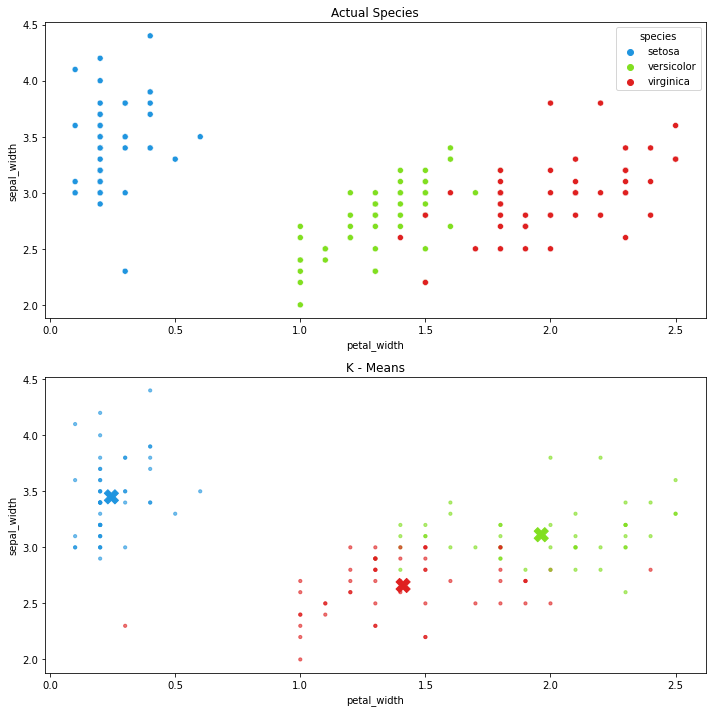

In [10]:
# Visualize the scatter plot for Actual vs predicted (K-Means)
viz_kmeans.viz_iris_2(iris, kmeans)

In [11]:
# Cluster Centers aka (centroids)

kmeans.cluster_centers_

array([[-0.06352134,  0.27850179, -0.91464848],
       [-1.00206653, -1.25634413,  0.90625492],
       [ 1.14336812,  1.00528835,  0.12824295]])

In [12]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,sepal_length,petal_width,sepal_width
0,-0.063521,0.278502,-0.914648
1,-1.002067,-1.256344,0.906255
2,1.143368,1.005288,0.128243


In [13]:
# Centriods for unscaled data?
centroids = iris.groupby('cluster')['petal_length', 'sepal_length'].mean()
centroids

,petal_length,sepal_length
cluster,,
0,4.352727,5.790909
1,1.465306,5.016327
2,5.489130,6.786957


In [14]:
# Another way
# use inverse scaler to get cluster centers in original unscaled units

scaler.inverse_transform(kmeans.cluster_centers_)

array([[5.79090909, 1.41090909, 2.66      ],
       [5.01632653, 0.24489796, 3.45102041],
       [6.78695652, 1.96304348, 3.11304348]])

In [15]:
# Labels (same as from predict)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

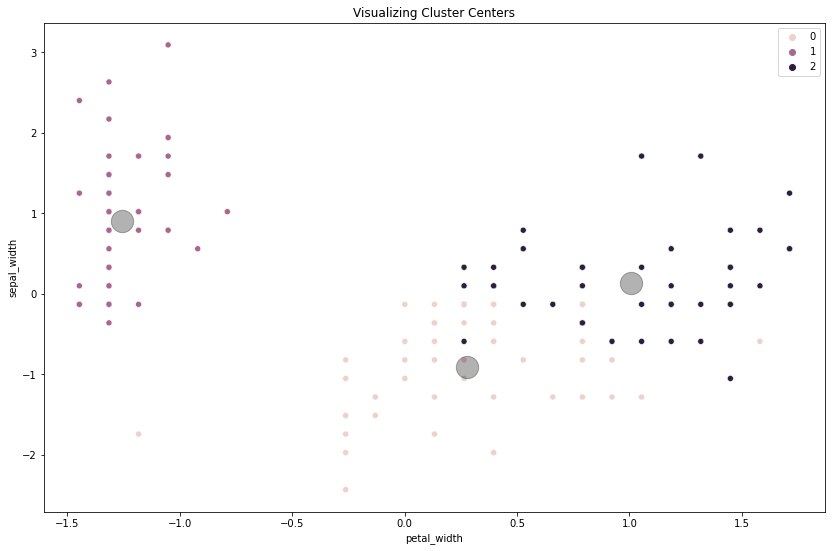

In [16]:
# lets visualize the clusters along with the centers on (scaled data).

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster

sns.scatterplot(x = 'petal_width', y= 'sepal_width', data = X_scaled, hue = X_scaled.cluster)

# plot cluster centers (centroids)

centroids_scaled.plot.scatter(x = 'petal_width', y = 'sepal_width', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)

plt.title('Visualizing Cluster Centers')
plt.legend();

In [17]:
iris['cluster'] = 'cluster_' + X_scaled.cluster.astype(str)
X_scaled['cluster'] = 'cluster_' + iris.cluster.astype(str)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,cluster_1
2,4.9,3.0,1.4,0.2,setosa,cluster_1
3,4.7,3.2,1.3,0.2,setosa,cluster_1
4,4.6,3.1,1.5,0.2,setosa,cluster_1
5,5.0,3.6,1.4,0.2,setosa,cluster_1


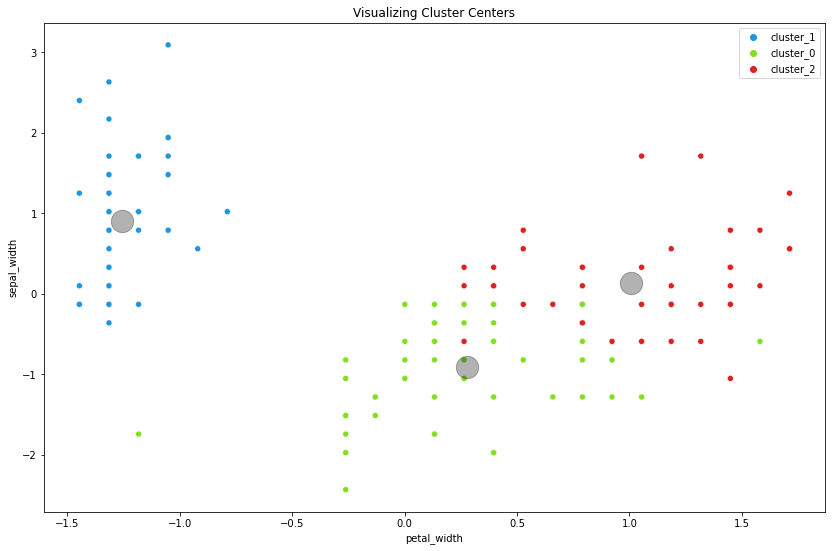

In [18]:
# lets visualize the clusters along with the centers on (scaled data).

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster

sns.scatterplot(x = 'petal_width', y= 'sepal_width', data = X_scaled, hue = iris.cluster)

# plot cluster centers (centroids)

centroids_scaled.plot.scatter(x = 'petal_width', y = 'sepal_width', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)

plt.title('Visualizing Cluster Centers')
plt.legend();

In [19]:
X = iris[['petal_width', 'sepal_width']]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

<AxesSubplot:xlabel='petal_width', ylabel='sepal_width'>

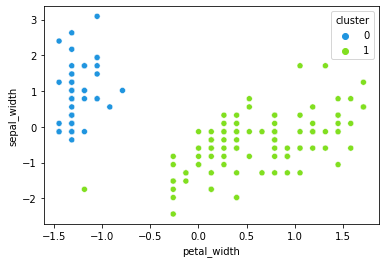

In [20]:
# lets look at two clusters (i.e k = 2)

kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)
sns.scatterplot(x='petal_width', y='sepal_width', data = X_scaled, hue = 'cluster')

In [21]:
X = iris[['petal_width', 'sepal_width']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

k =2 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

125.36847212365322

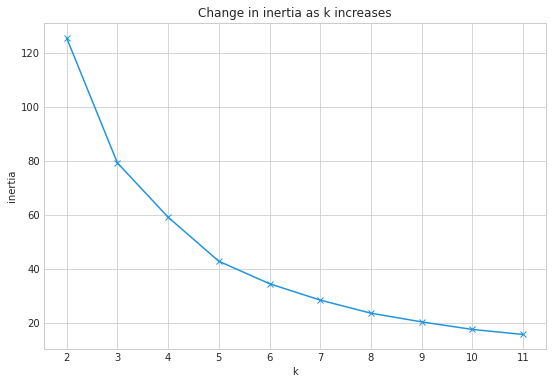

In [22]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

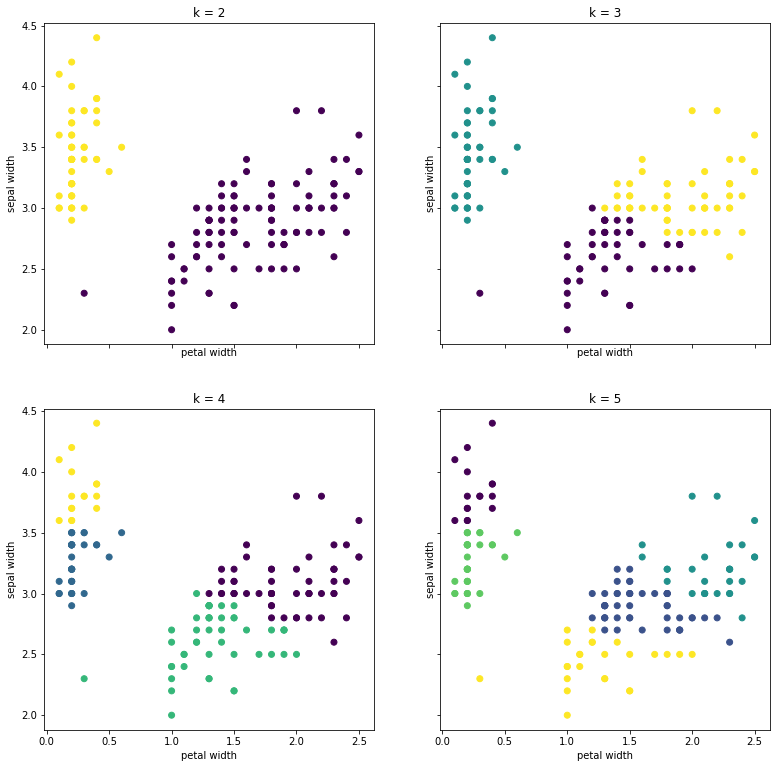

In [23]:
# What value of k is appropriate?


fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.petal_width, X.sepal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='petal width', ylabel='sepal width')

In [24]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [25]:
iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [26]:
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [27]:
# define independent variables for k-means # Makes the clusters on 'petal_length', 'sepal_length' 

X = iris[['sepal_width', 'sepal_length']]
X.head(3)

,sepal_width,sepal_length
1,3.5,5.1
2,3.0,4.9
3,3.2,4.7


In [28]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [29]:
#define the thing
kmeans = KMeans(n_clusters=3)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int32)

In [30]:
# make a new column names cluster in iris and X_scaled dataframe

iris['cluster'] = kmeans.predict(X_scaled)

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,2
2,4.9,3.0,1.4,0.2,setosa,2
3,4.7,3.2,1.3,0.2,setosa,2
4,4.6,3.1,1.5,0.2,setosa,2
5,5.0,3.6,1.4,0.2,setosa,2


In [31]:
X_scaled['clusters'] = kmeans.predict(X_scaled)

X_scaled.head()

,sepal_width,sepal_length,clusters
1,1.019004,-0.900681,2
2,-0.131979,-1.143017,2
3,0.328414,-1.385353,2
4,0.098217,-1.506521,2
5,1.249201,-1.021849,2


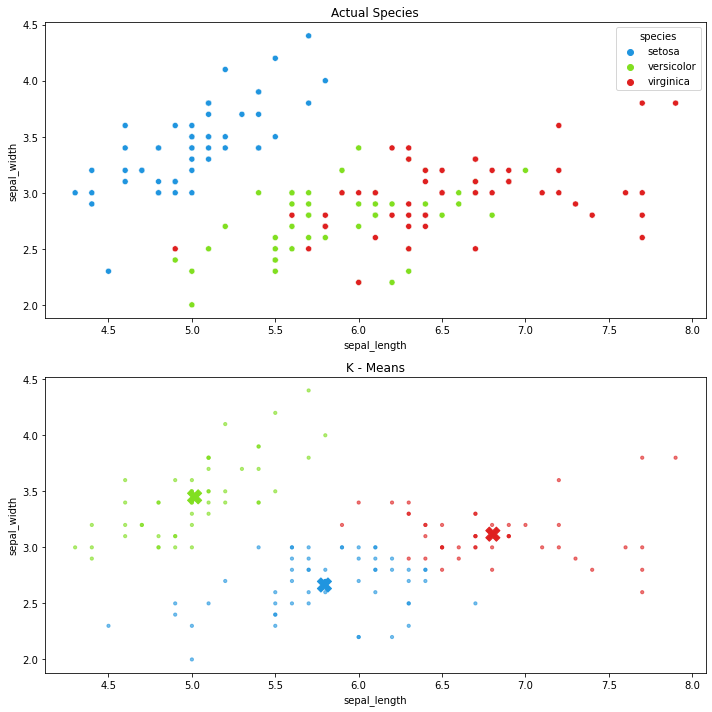

In [32]:
# Visualize the scatter plot for Actual vs predicted (K-Means)
viz_kmeans.viz_iris_3(iris, kmeans)

In [33]:
# Cluster Centers aka (centroids)

kmeans.cluster_centers_

array([[ 0.13914116,  1.16455787],
       [-0.90478291, -0.05899721],
       [ 0.90625492, -1.00206653]])

In [34]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,sepal_width,sepal_length
0,0.139141,1.164558
1,-0.904783,-0.058997
2,0.906255,-1.002067


In [35]:
# Centriods for unscaled data?

centroids = iris.groupby('cluster')['petal_length', 'sepal_length'].mean()
centroids

,petal_length,sepal_length
cluster,,
0,5.451111,6.804444
1,4.403571,5.794643
2,1.465306,5.016327


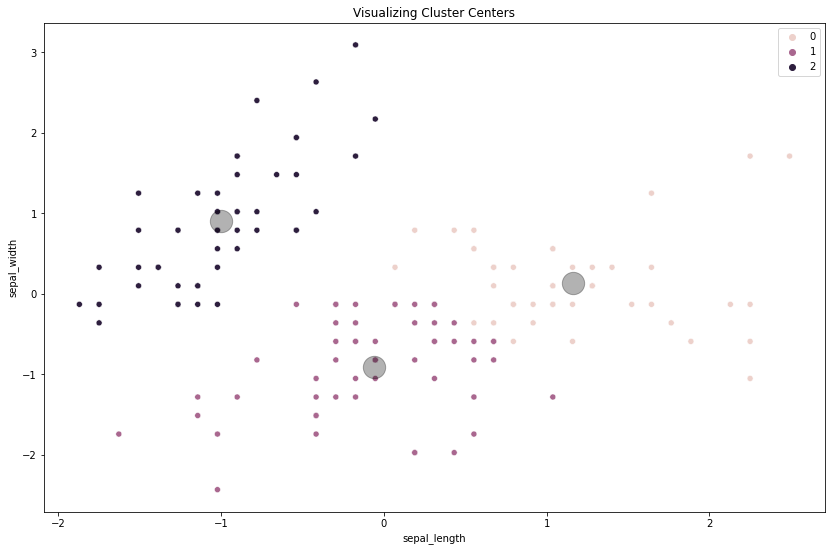

In [36]:
# lets visualize the clusters along with the centers on (scaled data).

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster

sns.scatterplot(x = 'sepal_length', y = 'sepal_width', data = X_scaled, hue = X_scaled.clusters)

# plot cluster centers (centroids)

centroids_scaled.plot.scatter(x = 'sepal_length', y = 'sepal_width', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)

plt.title('Visualizing Cluster Centers')
plt.legend();

In [37]:
iris['cluster'] = 'cluster_' + X_scaled.clusters.astype(str)
X_scaled['cluster'] = 'cluster_' + iris.cluster.astype(str)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,cluster_2
2,4.9,3.0,1.4,0.2,setosa,cluster_2
3,4.7,3.2,1.3,0.2,setosa,cluster_2
4,4.6,3.1,1.5,0.2,setosa,cluster_2
5,5.0,3.6,1.4,0.2,setosa,cluster_2


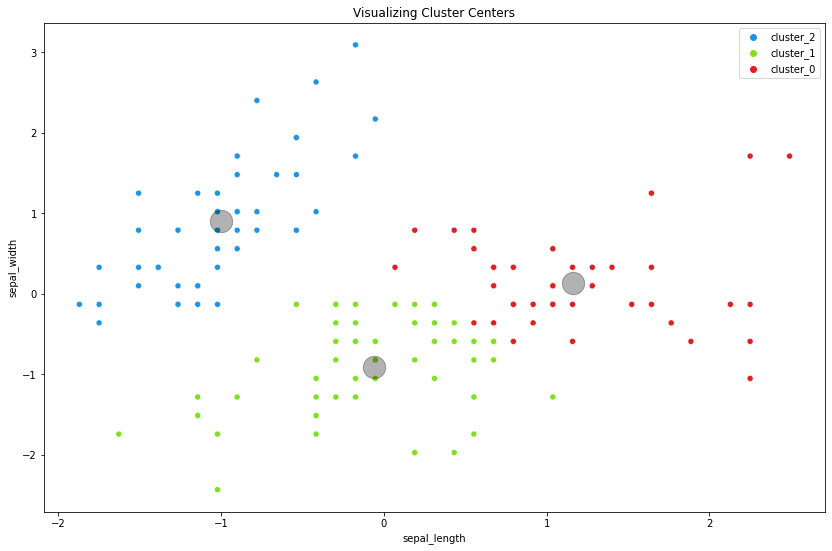

In [38]:
# lets visualize the clusters along with the centers on (scaled data).

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster

sns.scatterplot(x = 'sepal_length', y = 'sepal_width', data = X_scaled, hue = iris.cluster)

# plot cluster centers (centroids)

centroids_scaled.plot.scatter(x = 'sepal_length', y = 'sepal_width', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)

plt.title('Visualizing Cluster Centers')
plt.legend();


In [39]:
X = iris[['sepal_length', 'sepal_width']]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

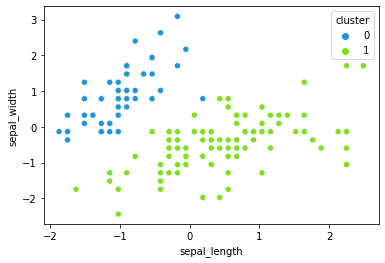

In [40]:
# lets look at two clusters (i.e k = 2)

kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)
sns.scatterplot(x = 'sepal_length', y = 'sepal_width', data = X_scaled, hue = 'cluster')

In [41]:
X = iris[['sepal_length', 'sepal_width']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

k =2 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

166.95170933934477

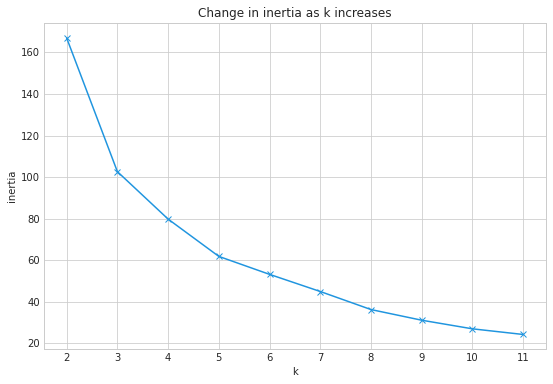

In [42]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

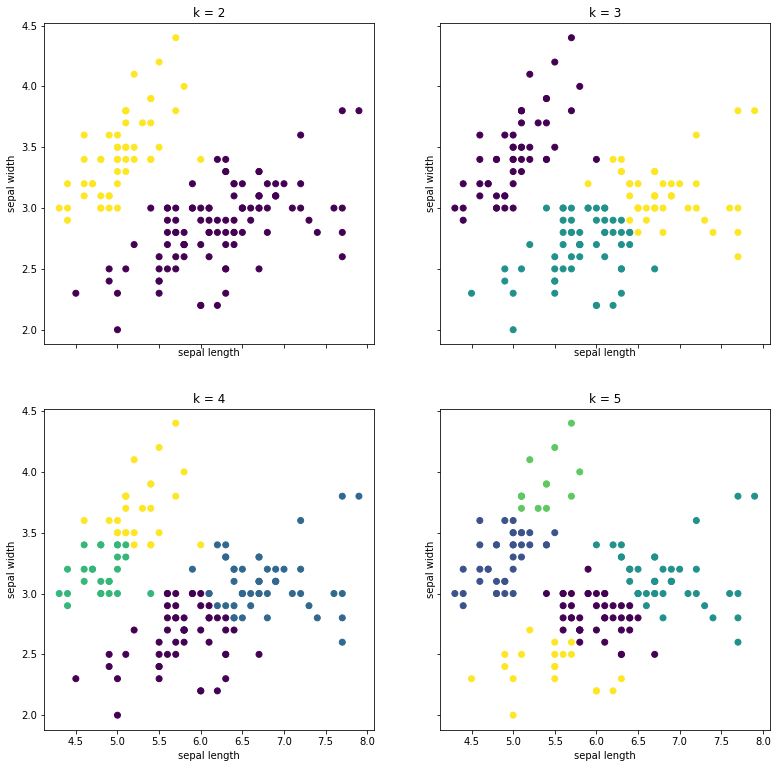

In [43]:
# What value of k is appropriate?


fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.sepal_length, X.sepal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal length', ylabel='sepal width')

2) Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [44]:
mall = acquire.get_mallcustomer_data()
mall.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [45]:
X = mall[['age', 'spending_score']]
X.head()

,age,spending_score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [46]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [47]:
X_scaled.head()

,age,spending_score
0,-1.424569,-0.434801
1,-1.281035,1.195704
2,-1.352802,-1.715913
3,-1.137502,1.040418
4,-0.563369,-0.395980


In [48]:
#define the thing
kmeans = KMeans(n_clusters=3)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2,
       0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       1, 2, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 0, 2, 2, 2, 1, 1, 1, 1, 2, 0, 2, 2, 0, 2, 0, 2, 1, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2,
       1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [49]:
# make a new column names cluster in iris and X_scaled dataframe

mall['cluster'] = kmeans.predict(X_scaled)

mall.head()


,customer_id,gender,age,annual_income,spending_score,cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,2
2,3,Female,20,16,6,0
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0


In [50]:
X_scaled['clusters'] = kmeans.predict(X_scaled)

X_scaled.head()

,age,spending_score,clusters
0,-1.424569,-0.434801,0
1,-1.281035,1.195704,2
2,-1.352802,-1.715913,0
3,-1.137502,1.040418,2
4,-0.563369,-0.395980,0


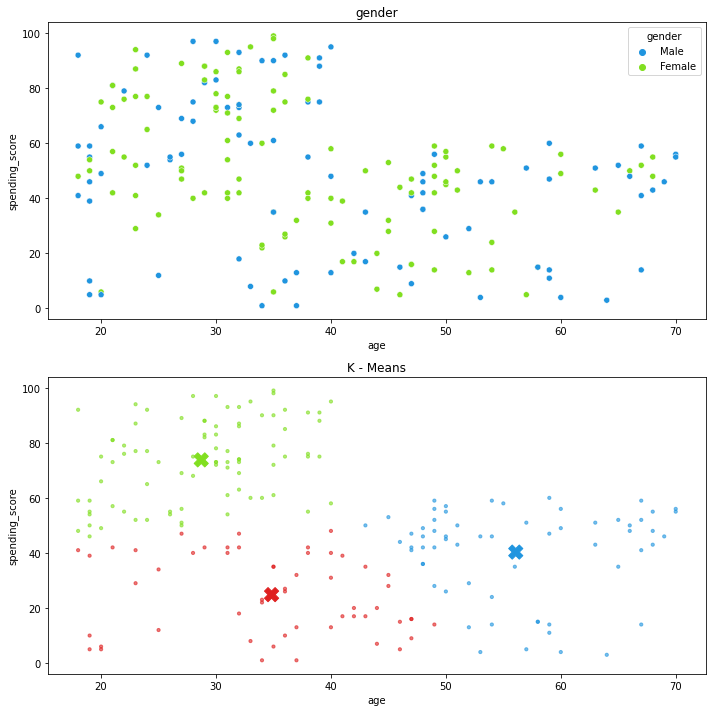

In [51]:
# Visualize the scatter plot for Actual vs predicted (K-Means)
viz_kmeans.viz_iris_4(mall, kmeans)

In [52]:
# Cluster Centers aka (centroids)

kmeans.cluster_centers_

array([[-0.28826287, -0.98405467],
       [ 1.23658636, -0.38408299],
       [-0.72740666,  0.9160964 ]])

In [53]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,age,spending_score
0,-0.288263,-0.984055
1,1.236586,-0.384083
2,-0.727407,0.916096


In [54]:
# Centriods for unscaled data?

centroids = mall.groupby('cluster')['age', 'spending_score'].mean()
centroids

,age,spending_score
cluster,,
0,34.833333,24.851852
1,56.080645,40.306452
2,28.714286,73.797619


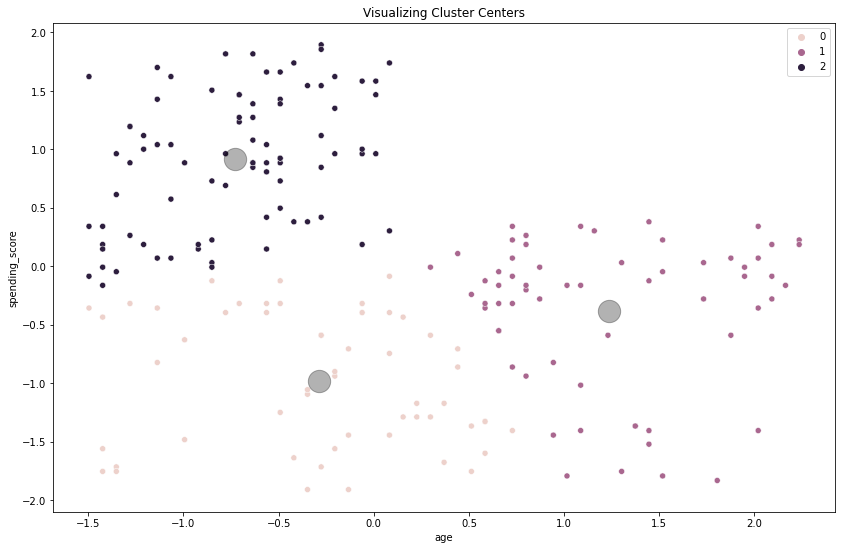

In [55]:
# lets visualize the clusters along with the centers on (scaled data).

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster

sns.scatterplot(x = 'age', y= 'spending_score', data = X_scaled, hue = X_scaled.clusters)

# plot cluster centers (centroids)

centroids_scaled.plot.scatter(x = 'age', y = 'spending_score', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)

plt.title('Visualizing Cluster Centers')
plt.legend();

In [56]:
mall['cluster'] = 'cluster_' + X_scaled.clusters.astype(str)
X_scaled['cluster'] = 'cluster_' + iris.cluster.astype(str)
mall.head()


,customer_id,gender,age,annual_income,spending_score,cluster
0,1,Male,19,15,39,cluster_0
1,2,Male,21,15,81,cluster_2
2,3,Female,20,16,6,cluster_0
3,4,Female,23,16,77,cluster_2
4,5,Female,31,17,40,cluster_0


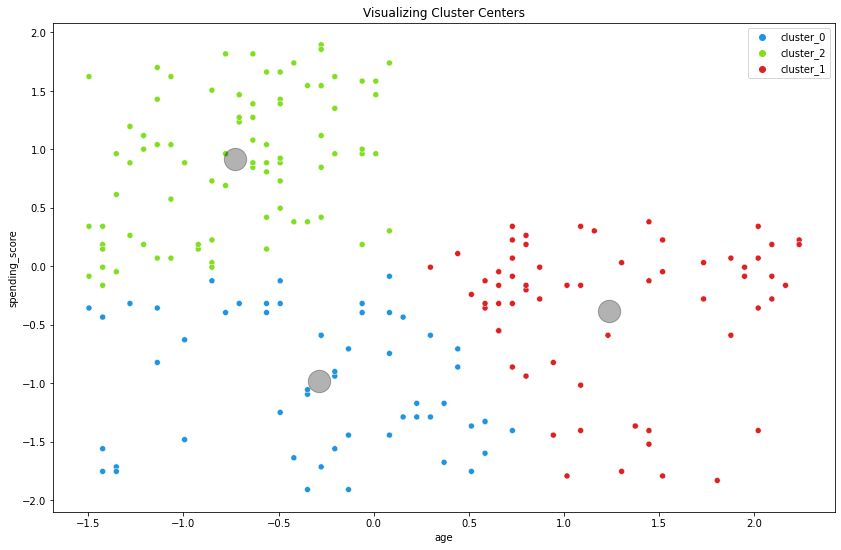

In [57]:
# lets visualize the clusters along with the centers on (scaled data).

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster

sns.scatterplot(x = 'age', y= 'spending_score', data = X_scaled, hue = mall.cluster)

# plot cluster centers (centroids)

centroids_scaled.plot.scatter(x = 'age', y = 'spending_score', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)

plt.title('Visualizing Cluster Centers')
plt.legend();


In [58]:
X = mall[['age', 'spending_score']]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

<AxesSubplot:xlabel='age', ylabel='spending_score'>

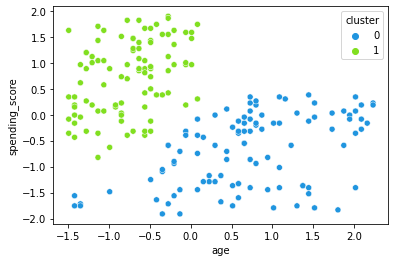

In [59]:
# lets look at two clusters (i.e k = 2)

kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)
sns.scatterplot(x='age', y='spending_score', data = X_scaled, hue = 'cluster')

In [60]:
X = mall[['age', 'spending_score']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

k =2 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

189.3874903399244

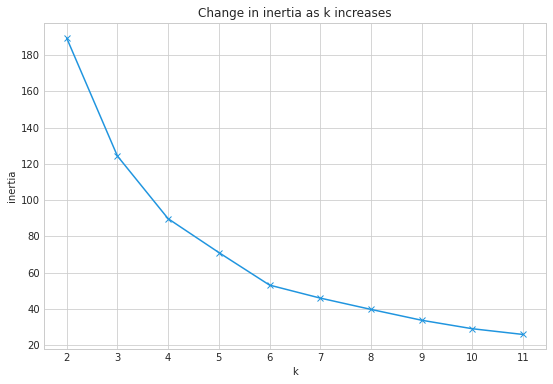

In [61]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

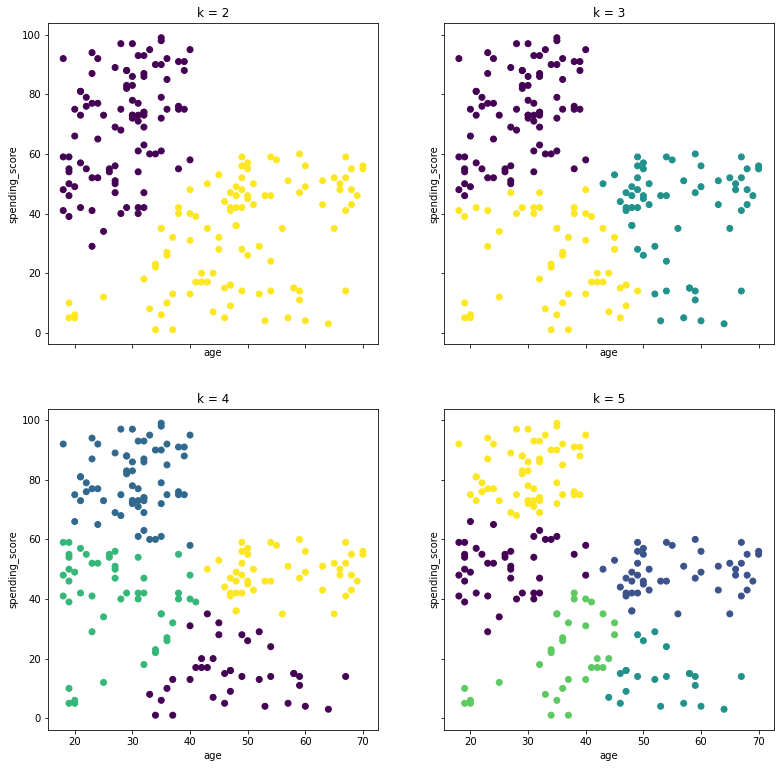

In [62]:
# What value of k is appropriate?


fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.age, X.spending_score, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='age', ylabel='spending_score')

- K = 3 is ideal, we have tow sub groups within the ages of 20 - 40 who have highs spending scores and low spending scores, While after 40 and on 
    we can see theres is a steep delcine in spending score for the whole cluster. 
- I want to look at the income distributions for each cluster to identify 20-40 year olds spending score in comparison to anual income. 

- Does the majority of people within the cluster of 20-40 year and lower anual income, have higher soending scores? 

In [63]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [64]:
mall = acquire.get_mallcustomer_data()
mall.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [65]:
X = mall[['age', 'annual_income']]
X.head()

,age,annual_income
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17


In [66]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [67]:
#define the thing
kmeans = KMeans(n_clusters=3)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [68]:
# make a new column names cluster in iris and X_scaled dataframe

mall['cluster'] = kmeans.predict(X_scaled)

mall.head()


,customer_id,gender,age,annual_income,spending_score,cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [69]:
X_scaled['clusters'] = kmeans.predict(X_scaled)

X_scaled.head()

,age,annual_income,clusters
0,-1.424569,-1.738999,0
1,-1.281035,-1.738999,0
2,-1.352802,-1.700830,0
3,-1.137502,-1.700830,0
4,-0.563369,-1.662660,0


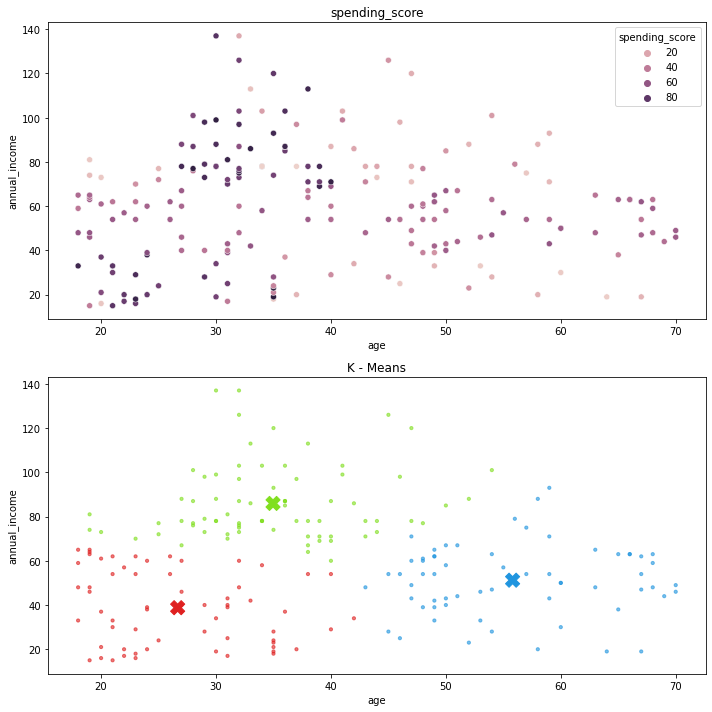

In [70]:
# Visualize the scatter plot for Actual vs predicted (K-Means)
viz_kmeans.viz_iris_5(mall, kmeans)

In [71]:
# Cluster Centers aka (centroids)

kmeans.cluster_centers_

array([[-0.87474334, -0.83093616],
       [ 1.2169084 , -0.35628084],
       [-0.27913465,  0.96851913]])

In [72]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,age,annual_income
0,-0.874743,-0.830936
1,1.216908,-0.356281
2,-0.279135,0.968519


In [74]:
# Centriods for unscaled data?

centroids = mall.groupby('cluster')['age', 'annual_income'].mean()
centroids

,age,annual_income
cluster,,
0,26.661290,38.790323
1,55.806452,51.225806
2,34.960526,85.934211


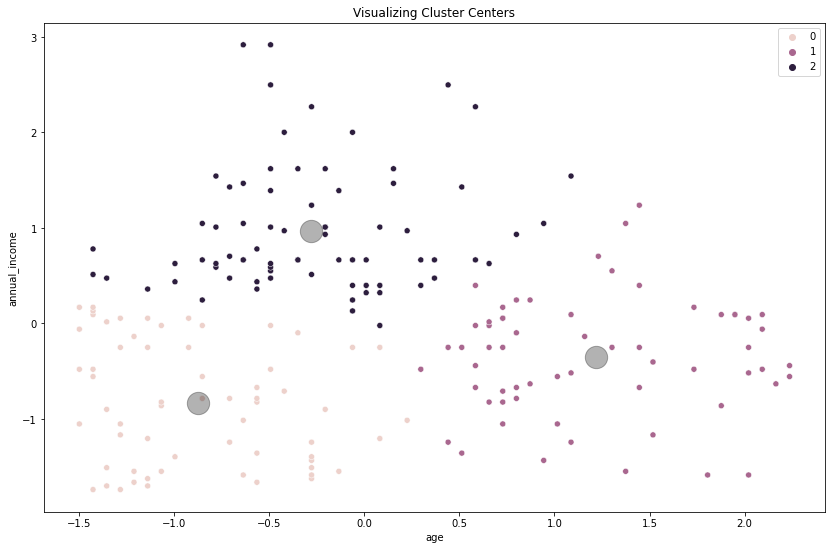

In [75]:
# lets visualize the clusters along with the centers on (scaled data).

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster

sns.scatterplot(x = 'age', y= 'annual_income', data = X_scaled, hue = X_scaled.clusters)

# plot cluster centers (centroids)

centroids_scaled.plot.scatter(x = 'age', y = 'annual_income', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)

plt.title('Visualizing Cluster Centers')
plt.legend();

In [76]:
mall['cluster'] = 'cluster_' + X_scaled.clusters.astype(str)
X_scaled['cluster'] = 'cluster_' + iris.cluster.astype(str)
mall.head()

,customer_id,gender,age,annual_income,spending_score,cluster
0,1,Male,19,15,39,cluster_0
1,2,Male,21,15,81,cluster_0
2,3,Female,20,16,6,cluster_0
3,4,Female,23,16,77,cluster_0
4,5,Female,31,17,40,cluster_0


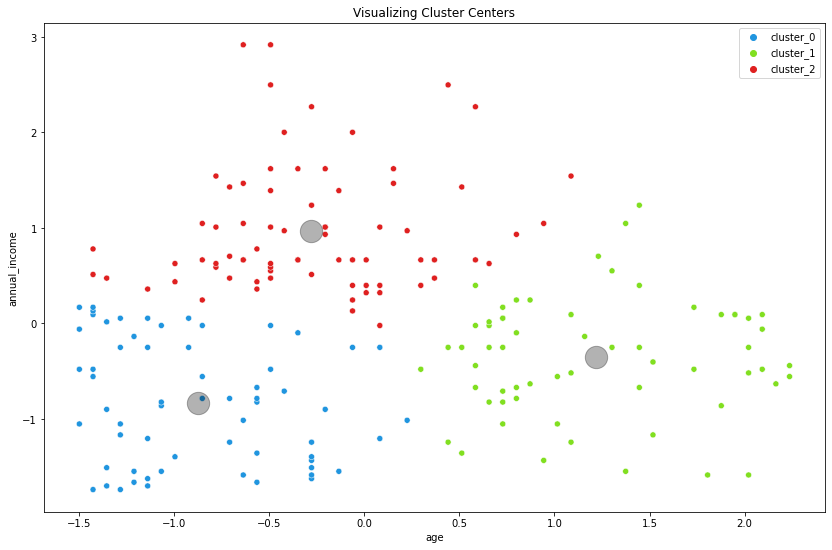

In [77]:
# lets visualize the clusters along with the centers on (scaled data).

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster

sns.scatterplot(x = 'age', y= 'annual_income', data = X_scaled, hue = mall.cluster)

# plot cluster centers (centroids)

centroids_scaled.plot.scatter(x = 'age', y = 'annual_income', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)

plt.title('Visualizing Cluster Centers')
plt.legend();


In [78]:
X = mall[['age', 'annual_income']]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

<AxesSubplot:xlabel='age', ylabel='annual_income'>

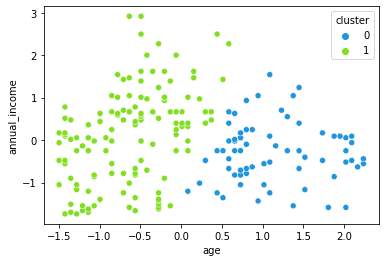

In [79]:
# lets look at two clusters (i.e k = 2)

kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)
sns.scatterplot(x='age', y='annual_income', data = X_scaled, hue = 'cluster')

In [80]:
X = mall[['age', 'annual_income']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

k =2 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

250.58811570754705

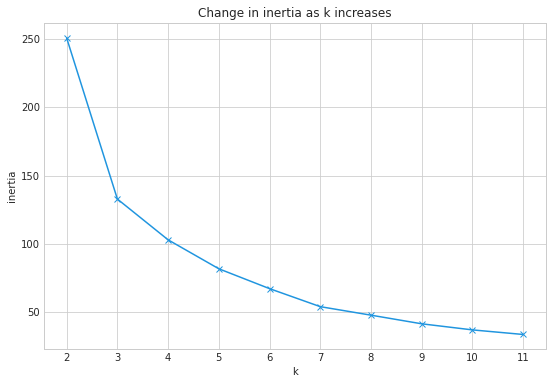

In [81]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

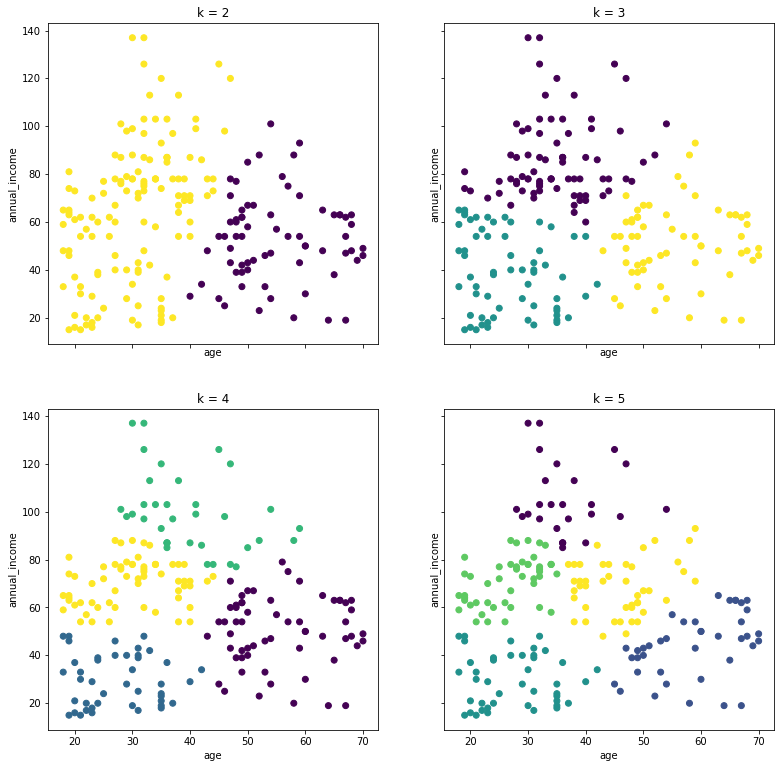

In [82]:
# What value of k is appropriate?


fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.age, X.annual_income, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='age', ylabel='annual_income')

<Figure size 1008x648 with 0 Axes>

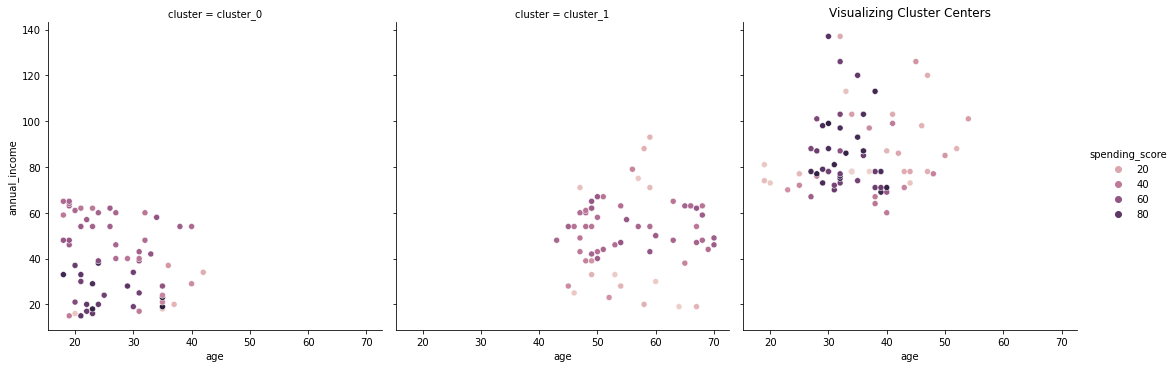

In [100]:
# lets visualize the clusters along with the centers on (scaled data).

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster

sns.relplot(x = 'age', y= 'annual_income', data = mall, col = mall.cluster, hue = 'spending_score')

# plot cluster centers (centroids)

# centroids_scaled.plot.scatter(x = 'age', y = 'annual_income', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)

plt.title('Visualizing Cluster Centers')
plt.show();

- Within the age range of 20-40 we can see that there are some individuals who have low anual income and a high spending score while also indivudals who have highe spending scores with high annual income. 
- The majority of ages past 40 years old, we see that there are indivualdas who have a moderate spending score while the anual income for this cluster is around its mean, This could be dude to retirerment pention. 

3) How does scaling impact the results of clustering?
    
- Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually.